In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = keras.datasets.cifar10.load_data()

In [3]:
print(f"shape of training_images: {training_images.shape}")
print(f"shape of training_labels: {training_labels.shape}")
print(f"shape of testing_images: {testing_images.shape}")
print(f"shape of testing_labels: {testing_labels.shape}")

shape of training_images: (50000, 32, 32, 3)
shape of training_labels: (50000, 1)
shape of testing_images: (10000, 32, 32, 3)
shape of testing_labels: (10000, 1)


In [4]:
training_images_nor = training_images.astype('float32') / 255.0
testing_images_nor = testing_images.astype('float32') / 255.0

In [5]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

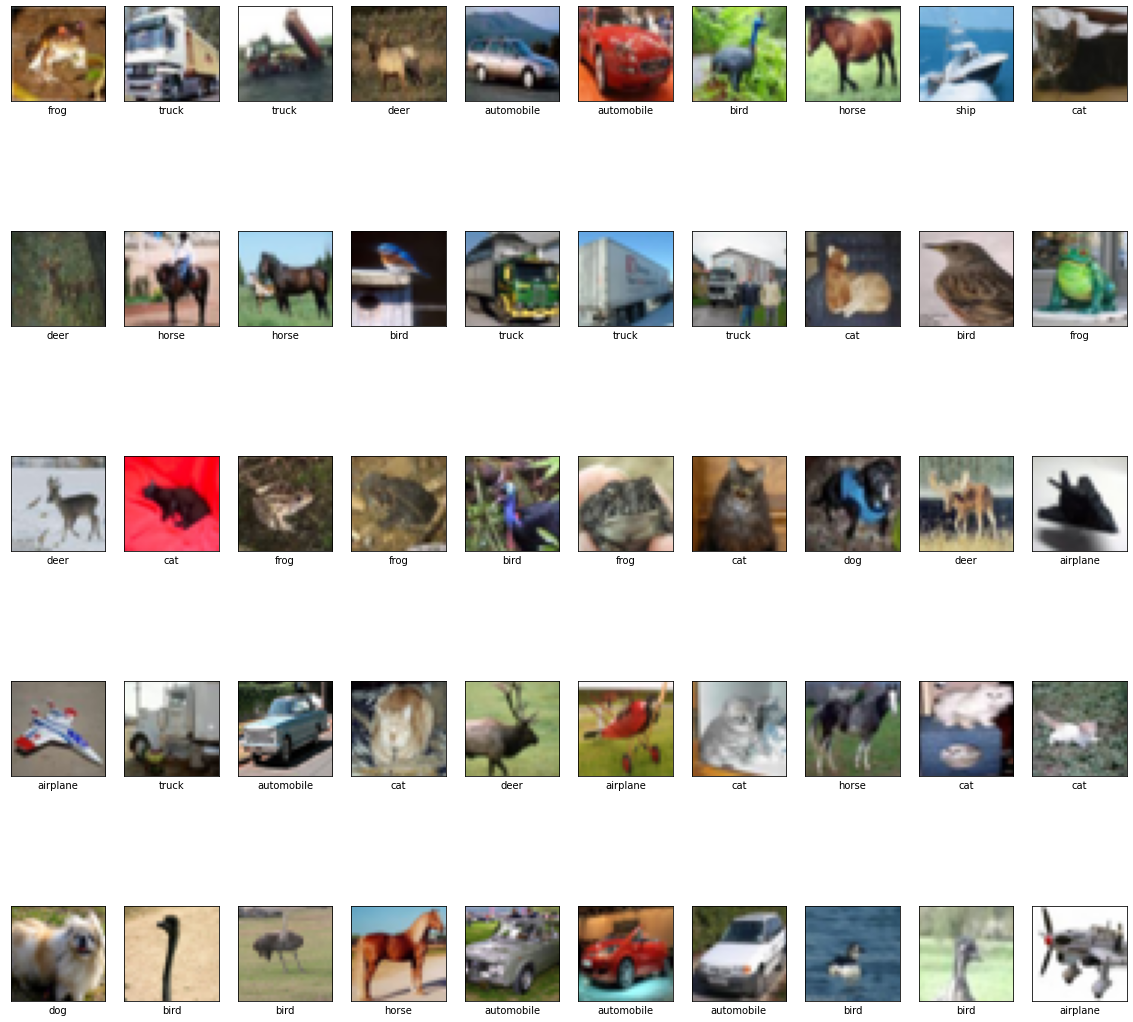

In [6]:
plt.figure(figsize=(20, 20))
for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(training_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(categories[training_labels[i][0]])
plt.show()

In [7]:
from warnings import filters
model = keras.Sequential([
        keras.Input(shape=(32, 32, 3)),
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),      
        keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),        
        keras.layers.Dense(units=64, activation='relu'),       
        keras.layers.Dense(units=10, activation='softmax')        
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [8]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=testing_images_nor, y=testing_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
55/55 [==============================] - 19s 317ms/step - loss: 2.1393 - accuracy: 0.1956 - val_loss: 1.8731 - val_accuracy: 0.2973
Epoch 2/10
55/55 [==============================] - 12s 220ms/step - loss: 1.8001 - accuracy: 0.3274 - val_loss: 1.6978 - val_accuracy: 0.3767
Epoch 3/10
55/55 [==============================] - 12s 220ms/step - loss: 1.6237 - accuracy: 0.3956 - val_loss: 1.5968 - val_accuracy: 0.4073
Epoch 4/10
55/55 [==============================] - 13s 229ms/step - loss: 1.5369 - accuracy: 0.4321 - val_loss: 1.5688 - val_accuracy: 0.4377
Epoch 5/10
55/55 [==============================] - 12s 227ms/step - loss: 1.4712 - accuracy: 0.4599 - val_loss: 1.4993 - val_accuracy: 0.4580
Epoch 6/10
55/55 [==============================] - 12s 220ms/step - loss: 1.3882 - accuracy: 0.4944 - val_loss: 1.4424 - val_accuracy: 0.4717
Epoch 7/10
55/55 [==============================] - 12s 220ms/step - loss: 1.2934 - accuracy: 0.5266 - val_loss: 1.3677 - val_accuracy: 0.5027

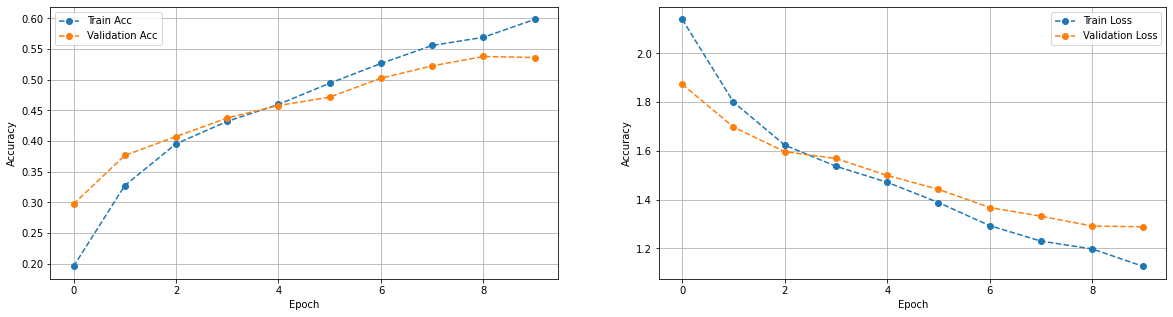

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [11]:
testing_images_pred = model.predict(testing_images_nor)
training_images_pred = model.predict(training_images_nor)

In [12]:
testing_loss, testing_acc = model.evaluate(testing_images_nor, testing_labels)

313/313 [==============================] - 4s 14ms/step - loss: 1.1218 - accuracy: 0.6092


In [13]:
print(f"Testing Loss: {testing_loss}")
print(f"Testing Accuracy: {testing_acc}")
print(f"Testing Images Prediction: {testing_images_pred}")

Testing Loss: 1.121835470199585
Testing Accuracy: 0.6092000007629395
Testing Images Prediction: [[1.01251965e-02 1.01923198e-02 1.66062176e-01 ... 3.05509754e-03
  4.29775566e-03 1.49756623e-02]
 [2.06431486e-02 4.62771237e-01 3.89714347e-04 ... 2.73824071e-06
  4.73347902e-01 4.27004360e-02]
 [1.25532508e-01 4.17116165e-01 1.19804265e-02 ... 3.57113313e-03
  2.66183913e-01 1.56636357e-01]
 ...
 [4.33415291e-04 2.53342179e-04 1.01660974e-01 ... 2.40957197e-02
  9.74720984e-04 1.64007442e-03]
 [5.58078885e-02 1.96313545e-01 2.29079545e-01 ... 1.40794450e-02
  3.65791051e-03 7.18918629e-03]
 [5.22335758e-03 1.41428865e-03 1.58664715e-02 ... 7.80702949e-01
  2.18017143e-04 6.66149613e-03]]
